In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#part1

In [3]:
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class KMeansClustering:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_indices = random.sample(range(X.shape[0]), self.n_clusters)
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self, X):
        similarities = cosine_similarity(X, self.centroids)
        cluster_group = np.argmax(similarities, axis=1)
        return cluster_group

    def move_centroids(self, X, cluster_group):
        new_centroids = []

        cluster_types = np.unique(cluster_group)

        for cluster_type in cluster_types:
            new_centroids.append(X[cluster_group == cluster_type].mean(axis=0))

        return np.array(new_centroids)
    
    def calculate_WCSS_cosine(X, k):
        wcss = []
        for i in range(1, k + 1):
            kmeans = KMeansClustering(n_clusters=i)
            cluster_group = kmeans.fit_predict(X)
            centroids = kmeans.centroids

            wcss_value = 0
            for j in range(i):
                cluster_points = X[cluster_group == j]
                cluster_centroid = centroids[j]
                wcss_value += np.sum(1 - cosine_similarity(cluster_points, [cluster_centroid]))

            wcss.append(wcss_value)

        return wcss

In [4]:
#part2

In [5]:
data = pd.read_csv("credit_card.csv")
data['CUST_ID'] = data['CUST_ID'].str.replace('C1', '', regex=False)
data['CUST_ID'] = data['CUST_ID'].astype(int)

In [6]:
mean1 = data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(mean1)

In [7]:
mean2 = data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(mean2)

In [8]:
data2 = data.drop('CUST_ID', axis=1)

In [9]:
indexwala = data['CUST_ID'].to_numpy()  

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2 = scaler.fit_transform(data2)
np.set_printoptions(suppress=True)
data2

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [11]:
 data_final = np.column_stack((indexwala, data2))

In [12]:
inertia = []
k_max = 1
max_inertia = float('inf')

for k in range(1, 11):
    kmeans = KMeansClustering(n_clusters=k, max_iter=100)
    cluster_assignments = kmeans.fit_predict(data_final)
    
    # cosine distance chya aivaji (1 - cosine similarity)
    wcss_value = 0
    for j in range(k):
        cluster_points = data_final[cluster_assignments == j]
        cluster_centroid = kmeans.centroids[j]
        wcss_value += np.sum(1 - cosine_similarity(cluster_points, [cluster_centroid]))
    
    inertia.append(wcss_value)

    if k > 1 and wcss_value < max_inertia:
        k_max = k
        max_inertia = wcss_value

print("Optimal K (number of clusters) based on Cosine Distance:", k_max)


Optimal K (number of clusters) based on Cosine Distance: 7


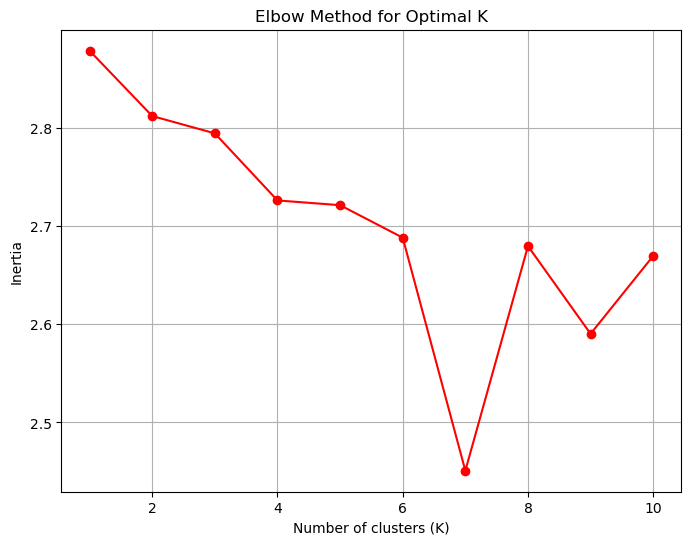

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='r')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [14]:
#part3

In [15]:
data = pd.read_csv("credit_card.csv")
data['CUST_ID'] = data['CUST_ID'].str.replace('C1', '', regex=False)
data['CUST_ID'] = data['CUST_ID'].astype(int)

In [16]:
mean1 = data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(mean1)

In [17]:
mean2 = data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(mean2)

In [18]:
data2 = data.drop('CUST_ID', axis=1)

In [19]:
indexwala = data['CUST_ID'].to_numpy()  

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2 = scaler.fit_transform(data2)
np.set_printoptions(suppress=True)
data2

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [21]:
 data_final = np.column_stack((indexwala, data2))

In [22]:
inertia = []
k_max=1;

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    if( k>1 and kmeans.inertia_ < max(inertia)):
        k_max=k
    inertia.append(kmeans.inertia_)

k_max

10

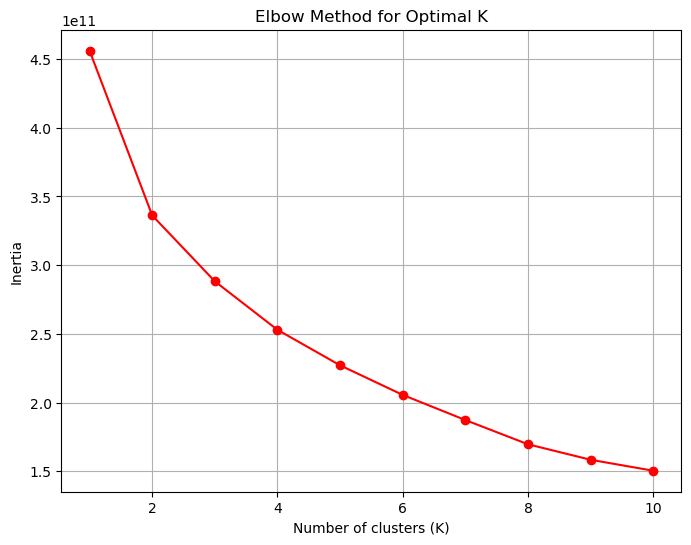

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='r')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [24]:
kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(data)

data['Cluster'] = kmeans.labels_

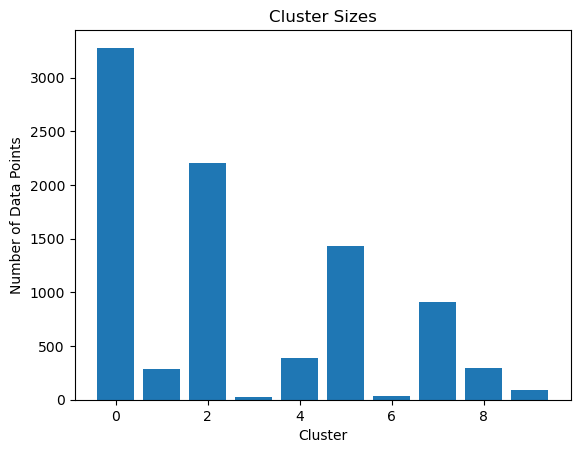

In [25]:
cluster_sizes = data['Cluster'].value_counts()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes')
plt.show()